# Homework 03 - Image Classification

## 0. Packages

In [80]:
# import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

## 1. CIFAR-10 Classification


### 1.1. Prepare the Dataset

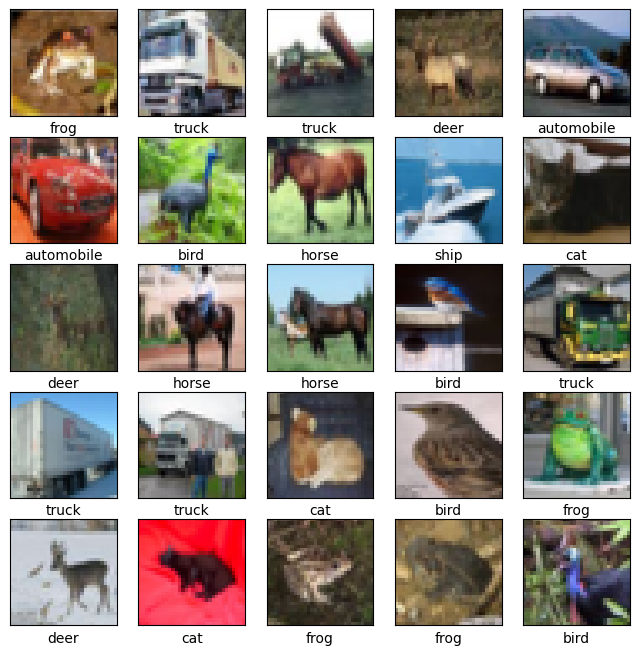

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


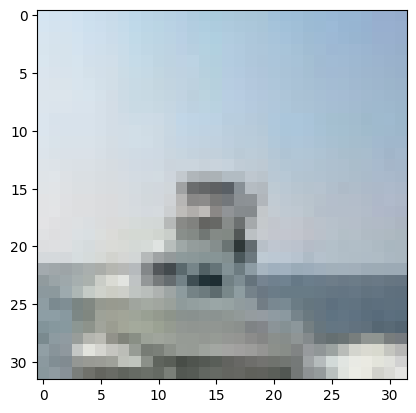

In [81]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# The CIFAR labels are arrays, so we flatten them for ease of use
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], aspect='auto')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Normalization and image reshaping
input_shape = (32, 32, 3)
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 3)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 3)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to one-hot encodings
train_labels = tf.one_hot(train_labels.astype(np.int32), depth=10)
test_labels = tf.one_hot(test_labels.astype(np.int32), depth=10)

# Show an example image
plt.imshow(train_images[100])
print(train_labels[100]) # => ship

### 1.2. The CNN Model

In [82]:
# Params
batch_size = 32
num_classes = 10 # don't change
epochs = 30
learning_rate = 0.0001
optimizer_1 = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, decay=1e-06)
optimizer_2 = tf.keras.optimizers.Adam(learning_rate=learning_rate, decay=1e-06)

In [83]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_images.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2), # https://databasecamp.de/en/ml/dropout-layer-en
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.summary()

model.compile(optimizer=optimizer_2, loss='categorical_crossentropy', metrics=['acc'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_57 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_58 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_59 (Conv2D)          (None, 13, 13, 64)        36928     
                                                     

### 1.3. Training the Network

In [84]:
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7153 - acc: 0.3768 - val_loss: 1.4500 - val_acc: 0.4839
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3919 - acc: 0.4992 - val_loss: 1.2652 - val_acc: 0.5521
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2554 - acc: 0.5531 - val_loss: 1.1517 - val_acc: 0.5957
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1512 - acc: 0.5932 - val_loss: 1.0660 - val_acc: 0.6291
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0665 - acc: 0.6235 - val_loss: 1.0112 - val_acc: 0.6440
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9999 - acc: 0.6502 - val_loss: 0.9234 - val_acc: 0.6772
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9424 - acc: 0.6697 - val_loss: 0.9146 - val_acc: 0.6823
Epoch 8/30
1563/1563 [==============================] - 7s 4ms

### 1.4. Visualization

313/313 [==============================] - 1s 2ms/step - loss: 0.7165 - acc: 0.7763


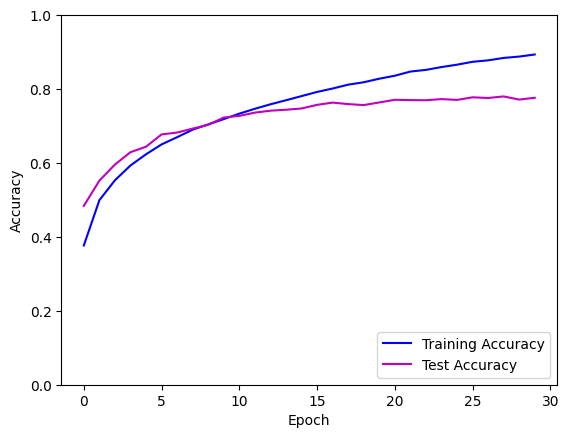

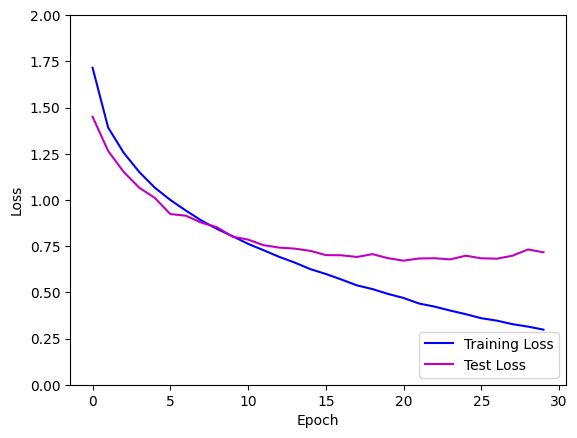

In [85]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

plt.plot(history.history['acc'], color='b', label='Training Accuracy')
plt.plot(history.history['val_acc'], color='m', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='m', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.show()

### 1.4.1 Confusion Matrix

313/313 [==============================] - 1s 1ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

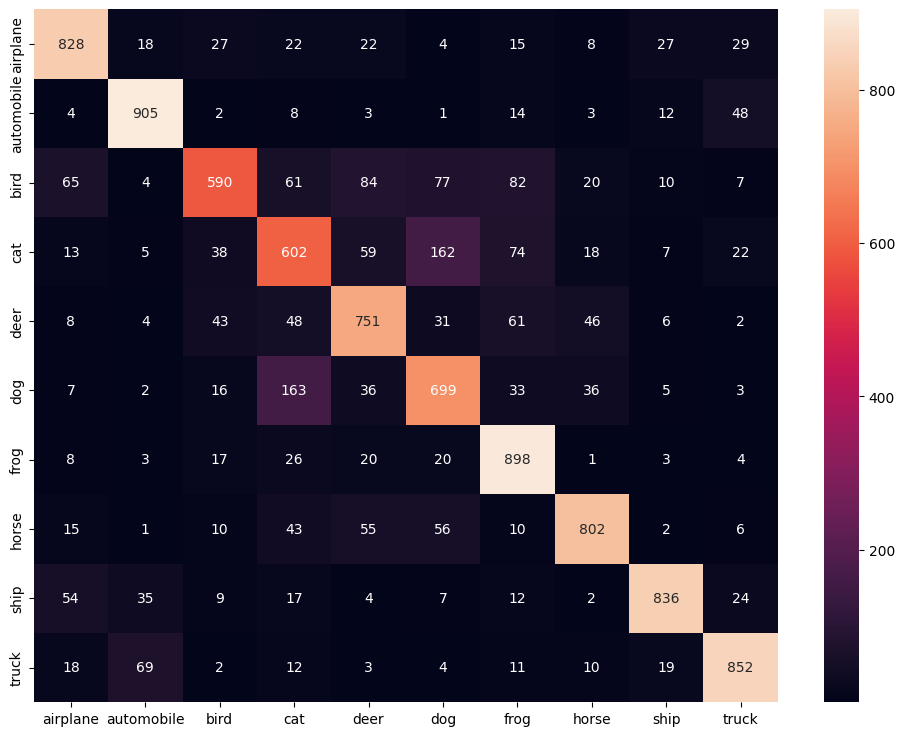

In [86]:
# Predict the values from the validation dataset
y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(test_labels, axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=class_names, yticklabels=class_names)

## 2. Adjust hyperparameters and architecture

#### Learning Rates
Permanent Parameters:
- epochs = 20
- optimizer = RMSprop
- decay = 1e-06

*Learning rate = 0.0001*

![title](img/learning_rate_0001_acc.png)
![title](img/learning_rate_0001_loss.png)
![title](img/learning_rate_0001_conf_matrix.png)

*Learning rate = 0.001*

![title](img/learning_rate_001_acc.png)
![title](img/learning_rate_001_loss.png)
![title](img/learning_rate_001_conf_matrix.png)


#### Optimizers
Permanent Parameters:
- epochs = 20
- decay = 1e-06

*RMSprop (Learning Rate = 0.0001)*

![title](img/learning_rate_0001_acc.png)
![title](img/learning_rate_0001_loss.png)
![title](img/learning_rate_0001_conf_matrix.png)

*Adam (Learning Rate = 0.0001)*

![title](img/optimizer_adam_acc.png)
![title](img/optimizer_adam_loss.png)
![title](img/optimizer_adam_conf_matrix.png)

*Adam (Learning Rate = 0.001)*

![title](img/optimizer_adam_rate_001_acc.png)
![title](img/optimizer_adam_rate_001_loss.png)
![title](img/optimizer_adam_rate_001_conf_matrix.png)


#### Architectures
Permanent Parameters:
- epochs = 20
- learning_rate = 0.0001
- optimizer = Adam
- decay = 1e-06

*Additional two 2D convolution layer (increased total from 4 to 6)*

![title](img/additional_conv2d_layer_acc.png)
![title](img/additional_conv2d_layer_loss.png)
![title](img/additional_conv2d_layer_conf_matrix.png)

*Dropout Rate = 0.1*

![title](img/dropout-0_1-acc.png)
![title](img/dropout-0_1-loss.png)
![title](img/dropout-0_1-conf-matrix.png)

*Dropout Rate = 0.2*

![title](img/dropout-0_2-acc.png)
![title](img/dropout-0_2-loss.png)
![title](img/dropout-0_2-conf-matrix.png)

*Dropout Rate = 0.9*

![title](img/dropout-0_9-acc.png)
![title](img/dropout-0_9-loss.png)
![title](img/dropout-0_9-conf-matrix.png)